## INSTALLATION STEPS:
* IMPACT-T
    - clone: https://github.com/impact-lbl/IMPACT-T.git
    - then build:
    ```bash
    // inside the IMPACT-T src/ directory:
    cmake -S . -B build
    cmake --build build
    // the executable in now in build/bin/

    // this command needs sudo if you install into system paths:
    cmake --build build --target install
    ```
* lume-impact
    - Install distgen first. lume-impact depends on distgen, make sure you have the correct one: https://github.com/ColwynGulliford/distgen.git
    - Install lume impact: https://github.com/ChristopherMayes/lume-impact.git (some other dependencies might be needed, but should be more straight forward than distgen)

In [1]:
from impact import Impact
import matplotlib.pyplot as plt
import numpy as np
# from distgen import Generator

### generating particle distribution is optional

In [2]:
# G = Generator("distgen.yaml")
# G['n_particle'] = 5000
# G.run()

In [3]:
def run_impact(fpath):
    I = Impact(
        fpath,
        # initial_particles=G.particles,
        verbose=True,
    )
    I.numprocs = 1
    I.stop = 0.16
    I.run()
    return I

In [4]:
result = run_impact("ImpactT.in")
particles = result.particles['final_particles']

Configured to run in: /tmp/tmpl6megl6x
Setting Npcol, Nprow = 1, 1
Removed element: stop_1
Set stop to s = 0.16
Running Impact-T in /tmp/tmpl6megl6x
/home/vagrant/.local/bin/ImpactTexe
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.2
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           28          28
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and jhigh:        10000           1       10000
 sumx1,sumy1:    3.2565036338625238E-004   3.4235701058176931E-005
 pass generating initial distribution...
 tstop:   0.16000000000000000     
 i,t,<z>:            1  -3.2491412781226548E-012   0.0000000000000000     
 zmin,zmax:   -3.7885877563836535E-006  -4.7260878955274357E-008
 i,t,<z>:            2  -3.2328517694558257E-012  -1.9329268838307885E-006
 time:    0.0000000000000000, elapse

# BEAM PARAMS

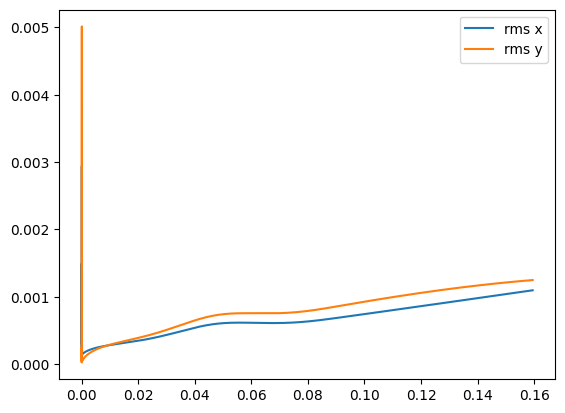

In [5]:
def plot_beam_params():
    rmsx = result.output['stats']['sigma_x']
    rmsy = result.output['stats']['sigma_y']
    mz = result.output['stats']['mean_z']
    plt.plot(mz, rmsx, label='rms x')
    plt.plot(mz, rmsy, label='rms y')
    plt.legend()

plot_beam_params()

In [6]:
def plot_result(x, y):
    hist, edges = np.histogramdd([x, y], 100)
    plt.imshow(
        hist.T.tolist(),
        cmap='viridis',
    )

### HORIZONTAL

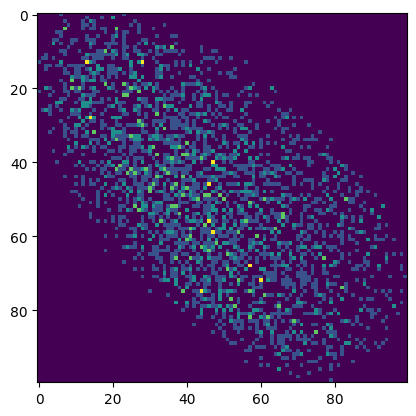

In [7]:
plot_result(particles.x, particles.px)

## VERTICAL

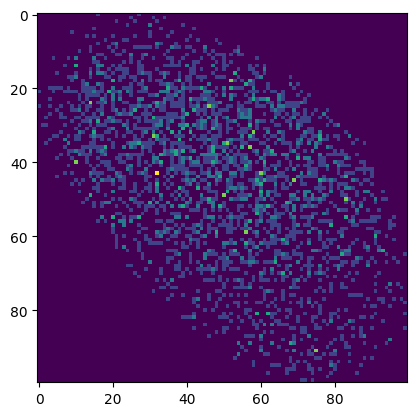

In [8]:
plot_result(particles.y, particles.py)

## CROSS SECTION

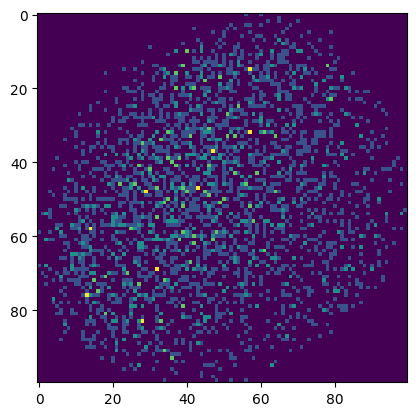

In [9]:
plot_result(particles.x, particles.y)

## LONGITUDINAL

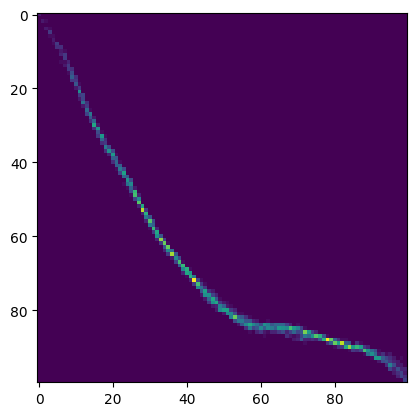

In [10]:
plot_result(particles.z, particles.pz)